In [1]:
library(data.table)
library(stringr)
library(plyr)
library(ggplot2)
library(ggpubr)


Warning message:
“package ‘data.table’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘ggpubr’ was built under R version 4.2.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




## 1. mutation MutRat comparison (one by one)

In [147]:
INDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/2.final_phy_re/"
OUTDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/figures/"
setwd(INDIR)
# samplelist <- read.delim("F:/SMALT/Results/sample_list_phy_filtered.txt",header = T)
# setDT(samplelist)
# samplelist[, sampleType := paste0(cat, "_",type)]
sampleTypes = c("IBD_N","IBD_T")
samplesall = list(c("2_N","4_N","5_N","16_N","19_N","47_N1","47_N4","47_N5","47_N6","47_N8",
                    "49_N","50_N","65_N","66_N"),
                  c("2_T2","2_T3","4_T","5_T","16_T","47_T1","47_T4","47_T5","47_T6","47_T8",
                    "49_T1","49_T3","50_T","65_T1","65_T3","66_T","19_T1","19_T3","19_T4","19_T5")
                  )
################################################################################
## 1. one by one -- N
samples = samplesall[[1]]
N <- data.table()
for(my.sample in 1:length(samples)){
# message("Calculating ", samples[my.sample], "...")
    x <- read.delim(paste0(samples[my.sample],"_filtered_re.phy"),header = F, sep = " ",
                colClasses=c("character","character"),skip = 2,
                col.names = c("cellID","bi"))
    new <- sapply(as.list(1:nrow(x)),function(i){
        s <- x$bi[i]
        which(strsplit(s,"")[[1]]=="1")
    })
    new <- unlist(new)
    d <- data.table(table(new))
    d$N <- d$N/nrow(x)
    colnames(d) <-c("Posi",samples[my.sample])
    d$Posi <- as.numeric(d$Posi)
  if(my.sample >1){
      N <- merge(N, d, by="Posi", all=TRUE)
  }else{N <- d}
}
################################################################################
## 2. one by one -- T
samples = samplesall[[2]]
T <- data.table()
for(my.sample in 1:length(samples)){
# message("Calculating ", samples[my.sample], "...")
    x <- read.delim(paste0(samples[my.sample],"_filtered_re.phy"),header = F, sep = " ",
                colClasses=c("character","character"),skip = 2,
                col.names = c("cellID","bi"))
    new <- sapply(as.list(1:nrow(x)),function(i){
        s <- x$bi[i]
        which(strsplit(s,"")[[1]]=="1")
    })
    new <- unlist(new)
    d <- data.table(table(new))
    d$N <- d$N/nrow(x)
    colnames(d) <-c("Posi",samples[my.sample])
    d$Posi <- as.numeric(d$Posi)
  if(my.sample >1){
      T <- merge(T, d, by="Posi", all=TRUE)
  }else{T <- d}
}
################################################################################
## 3. one by one -- fly
fly <- read.delim("/data2/kantian/LineageTracing/SMALT/0.Results/9.fly/PerSiteMutationRate.tsv",header =TRUE)
fly$Posi <- 2957-fly$Posi
L5 <- fly[fly$Fly=="L5",]
L6 <- fly[fly$Fly=="L6",]
L5 <- L5[,c(2,5)]
L6 <- L6[,c(2,5)]
colnames(L5)[2] <- "L5"
colnames(L6)[2] <- "L6"
################################################################################
## 4. merge
N <- merge(N, L5, by = "Posi", all=TRUE)
N <- merge(N, L6, by = "Posi", all=TRUE)
N[is.na(N)] <- 0
T <- merge(T, L5, by = "Posi", all=TRUE)
T <- merge(T, L6, by = "Posi", all=TRUE)
T[is.na(T)] <- 0
N[1:3,]

Posi,2_N,4_N,5_N,16_N,19_N,47_N1,47_N4,47_N5,47_N6,47_N8,49_N,50_N,65_N,66_N,L5,L6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0,0,0.0002656042,0.0002608242,0.001220008,0.0008899436,0,0,0.0008163265,0.000231696,0,0.0000000000,0,0.0004943154,0,0
5,0,0,0.0002656042,0.0000000000,0.001220008,0.0000000000,0,0,0.0000000000,0.000000000,0,0.0000000000,0,0.0000000000,0,0
6,0,0,0.0002656042,0.0000000000,0.002033347,0.0002966479,0,0,0.0000000000,0.000000000,0,0.0004653327,0,0.0004943154,0,0


In [148]:
T[1:3,]

Posi,2_T2,2_T3,4_T,5_T,16_T,47_T1,47_T4,47_T5,47_T6,⋯,50_T,65_T1,65_T3,66_T,19_T1,19_T3,19_T4,19_T5,L5,L6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0,0,0,0.0002630195,0,0,0,0.001362398,0,⋯,0,0,0,0,0.001310616,0.0000000000,0.0007042254,0.001305483,0,0
5,0,0,0,0.0000000000,0,0,0,0.000000000,0,⋯,0,0,0,0,0.001310616,0.0006079027,0.0000000000,0.000000000,0,0
6,0,0,0,0.0002630195,0,0,0,0.000000000,0,⋯,0,0,0,0,0.000000000,0.0012158055,0.0000000000,0.001305483,0,0


In [149]:
.plotCorrelation <- function(TSS.all.samples){
  z <- TSS.all.samples
  # Customize lower panel
  panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1), xlog = FALSE, ylog = FALSE)
    r <- round(cor(x, y), digits=2)
    txt <- paste0( r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
  }
  # Customize upper panel
  upper.panel<-function(x, y){
    points(x,y, pch = ".",col = "#00AFBB")
  }
  # Create the plots
  suppressWarnings(pairs(z, lower.panel = upper.panel,upper.panel = panel.cor, log = "xy"))
}
pdf(file = paste0(OUTDIR,"fig9.1.correlation_mouse_fly_log.pdf"), width=12, height =12)
.plotCorrelation(N[,2:ncol(N)])
.plotCorrelation(T[,2:ncol(T)])
dev.off()


png 
  2

In [5]:
.plotCorrelation <- function(TSS.all.samples){
  z <- TSS.all.samples
  # Customize lower panel
  panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1), xlog = FALSE, ylog = FALSE)
    r <- round(cor(x, y), digits=2)
    txt <- paste0( r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
  }
  # Customize upper panel
  upper.panel<-function(x, y){
    points(x,y, pch = ".",col = "#00AFBB")
  }
  # Create the plots
  suppressWarnings(pairs(z, lower.panel = upper.panel,upper.panel = panel.cor))
}
# pdf(file = paste0(OUTDIR,"fig9.1.correlation_mouse_fly.pdf"), width=12, height =12)
# .plotCorrelation(N[,2:ncol(N)])
# .plotCorrelation(T[,2:ncol(T)])
# dev.off()


## 2. mutation MutRat comparison (merge)

In [8]:
INDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/2.final_phy_re/"
OUTDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/figures/"
setwd(INDIR)
# samplelist <- read.delim("F:/SMALT/Results/sample_list_phy_filtered.txt",header = T)
# setDT(samplelist)
# samplelist[, sampleType := paste0(cat, "_",type)]
sampleTypes = c("WT_N","Apc_N","IBD_N","Apc_P","IBD_T")
samplesall = list(c("WT1_N5","WT1_N7","WT2_N3","WT2_N5"),
                  c("68_N","72_N","71_N","75_N"),
                  c("2_N","4_N","5_N","16_N","19_N","47_N1","47_N4","47_N5","47_N6","47_N8",
                    "49_N","50_N","65_N","66_N", "17_N","151_N"),#"132_N","18_N",,,"142_N","148_N"
                  c("68_P1","68_P2","68_P3","68_P4","68_P5-1","68_P5-2","68_P5-3",
                    "68_P5-4","68_P5-5","72_P1","72_P2","72_P4","72_P5","72_P6","72_P8","72_P9",
                    "71_P3","75_P3","75_P5","75_P8","75_P11"),
                  c("2_T2","2_T3","4_T","5_T","16_T","47_T1","47_T4","47_T5","47_T6","47_T8",
                    "49_T1","49_T3","50_T","65_T1","65_T3","66_T","19_T1","19_T3","19_T4","19_T5",
                    "132_T1","151_T4","17_T4","18_T3","18_T4") ##,"142_T1","142_T2","142_T5-4","148_T1","148_T3"
                  )
################################################################################
## 3. merge in one -- all
samples = unlist(samplesall)
dt <- data.table()
numT <- 0
for(my.sample in 1:length(samples)){
# message("Calculating ", samples[my.sample], "...")
    x <- read.delim(paste0(samples[my.sample],"_filtered_re.phy"),header = F, sep = " ",
                colClasses=c("character","character"),skip = 2,
                col.names = c("cellID","bi"))
    new <- sapply(as.list(1:nrow(x)),function(i){
        s <- x$bi[i]
        which(strsplit(s,"")[[1]]=="1")
    })
    new <- unlist(new)
    d <- data.table(table(new))
    colnames(d) <-c("Posi",samples[my.sample])
    d$Posi <- as.numeric(d$Posi)

    numT <- numT + nrow(x)
  if(my.sample >1){
      dt <- merge(dt, d, by="Posi", all=TRUE)
  }else{dt <- d}
}
dt[is.na(dt)] <- 0
dt <- data.table(Posi = dt$Posi, mouse = rowSums(dt[,2:ncol(dt)]))
dt$mouse <- dt$mouse/numT
################################################################################
## 3. one by one -- fly
fly <- read.delim("/data2/kantian/LineageTracing/SMALT/0.Results0.99/9.fly/PerSiteMutationRate.tsv",header =TRUE)
fly$Posi <- 2957-fly$Posi
fly <- fly[fly$Fly=="L5andL6",]
fly <- fly[,c(2,5)]
colnames(fly)[2] <- "Fly"
################################################################################
## 4. merge all and fly
dt_merge <- merge(dt, fly, by = "Posi", all=TRUE)
dt_merge[is.na(dt_merge)] <- 0
dt_merge[1:3,]

Posi,mouse,Fly
<dbl>,<dbl>,<dbl>
3,0.0001127338,0
4,0.0004611837,0
5,0.0002459646,0


In [ ]:
p <- ggplot(dt_merge, aes(x=mouse, y=Fly))+geom_point(color="#2885A9",alpha=0.5)+geom_smooth(method=lm, color="#9F1F31")+
stat_cor(p.accuracy=0.001,r.accuracy=0.01)+scale_x_log10()+scale_y_log10()+#xlim(0,NA)+ylim(0,NA)+
labs(x="Per-site mutation rate (Mouse)",y="Per-site mutation rate (Fly)")+
theme_classic()+
theme(axis.title=element_text(size=10), axis.text=element_text(size=8))
p
pdf(file = paste0(OUTDIR,"1e.fig9.1.correlation_mouse_fly_merge_log.pdf"), width=4, height = 3.5)
p
dev.off()

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 744 rows containing non-finite values (`stat_bin2d()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 744 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 744 rows containing non-finite values (`stat_cor()`).”


png 
  2

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 744 rows containing non-finite values (`stat_bin2d()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 744 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 744 rows containing non-finite values (`stat_cor()`).”


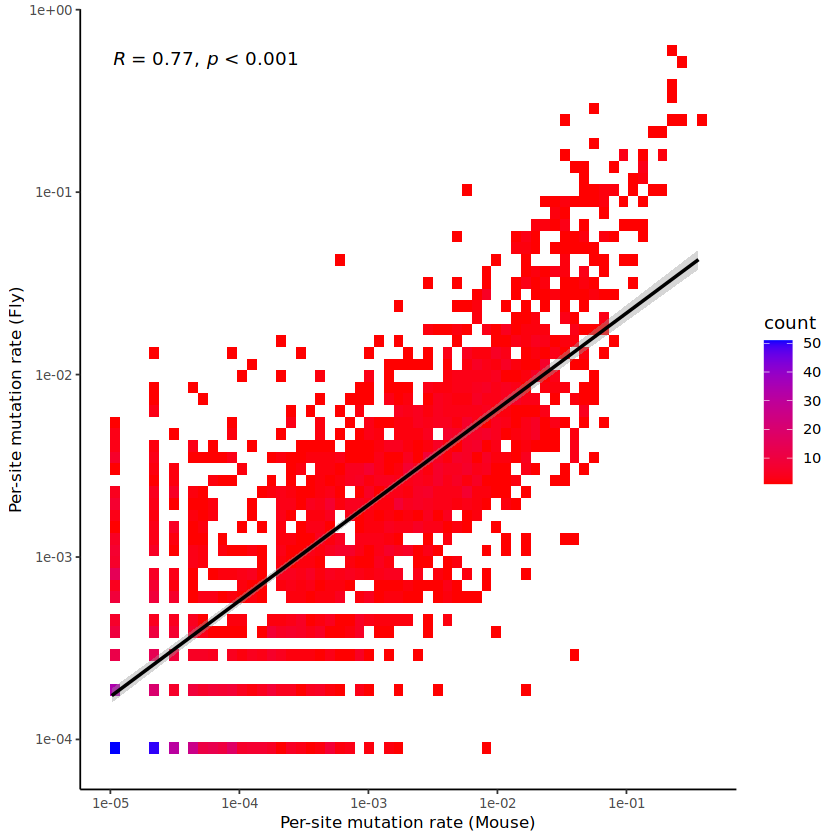

In [10]:
p1 <- ggplot(dt_merge, aes(x=mouse, y=Fly))+geom_bin2d(bins=60)+
    geom_smooth(method=lm, color="black")+#geom_point(color="#2885A9",alpha=0.5)+###9F1F31
    stat_cor(p.accuracy=0.001,r.accuracy=0.01)+scale_x_log10()+scale_y_log10()+#xlim(0,NA)+ylim(0,NA)+
    labs(x="Per-site mutation rate (Mouse)",y="Per-site mutation rate (Fly)")+
    theme_classic()+
    theme(axis.title=element_text(size=10), axis.text=element_text(size=8))+
    scale_fill_gradient(low="red", high="blue")##blue and lighted blue 0.9
    # scale_fill_gradient(low="#E4E4FF", high="darkblue")##2885A9
pdf(file = paste0(OUTDIR,"fig1e.correlation_mouse_fly_merge_log2.pdf"), width=4.4, height = 3.5)
p1
dev.off()
p1

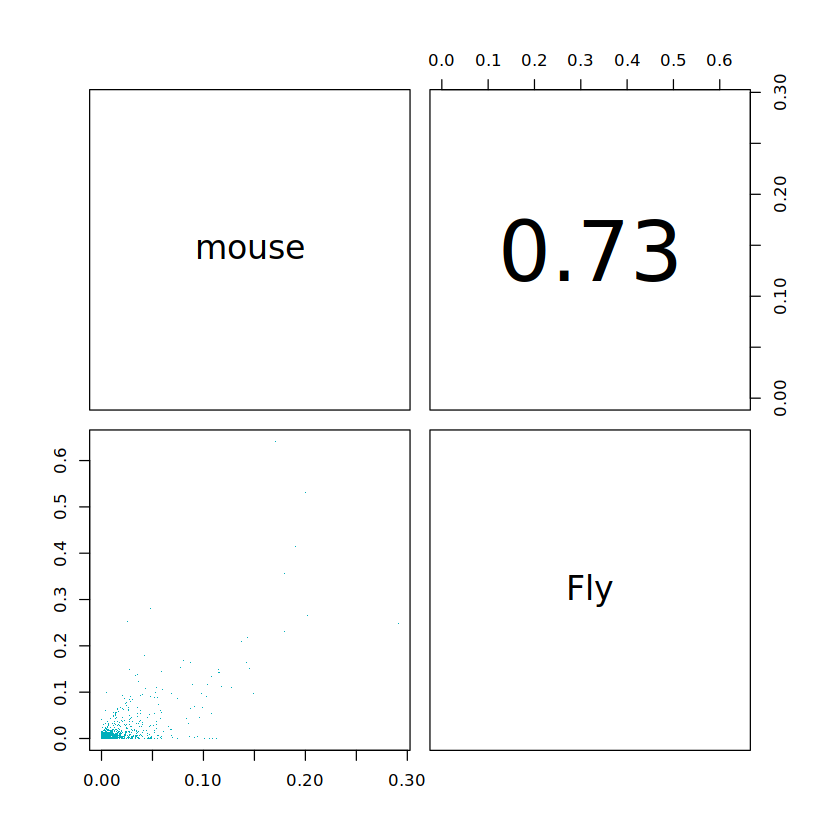

In [6]:
.plotCorrelation(dt_merge[,2:ncol(dt_merge)])

In [152]:
N <- merge(N, T, by = "Posi", all=TRUE)
T <- merge(N, fly, by = "Posi", all=TRUE)
T[is.na(T)] <- 0
T[1:3,]

Posi,IBD_N,IBD_T,Fly
<dbl>,<dbl>,<dbl>,<dbl>
4,0.0004207144,4.122181e-04,0
5,0.0001529871,8.244363e-05,0
6,0.0003442209,2.473309e-04,0


In [160]:
.plotCorrelation <- function(TSS.all.samples){
  z <- TSS.all.samples
  # Customize lower panel
  panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1), xlog = FALSE, ylog = FALSE)
    r <- round(cor(x, y), digits=2)
    txt <- paste0( r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
  }
  # Customize upper panel
  upper.panel<-function(x, y){
    points(x,y, pch = ".",col = "#00AFBB")
  }
  # Create the plots
  suppressWarnings(pairs(z, lower.panel = upper.panel,upper.panel = panel.cor, log = "xy"))
}
# pdf(file = paste0(OUTDIR,"fig9.1.correlation_mouse_fly_merge_log.pdf"), width=6, height =6)
# .plotCorrelation(T[,2:ncol(T)])
# dev.off()


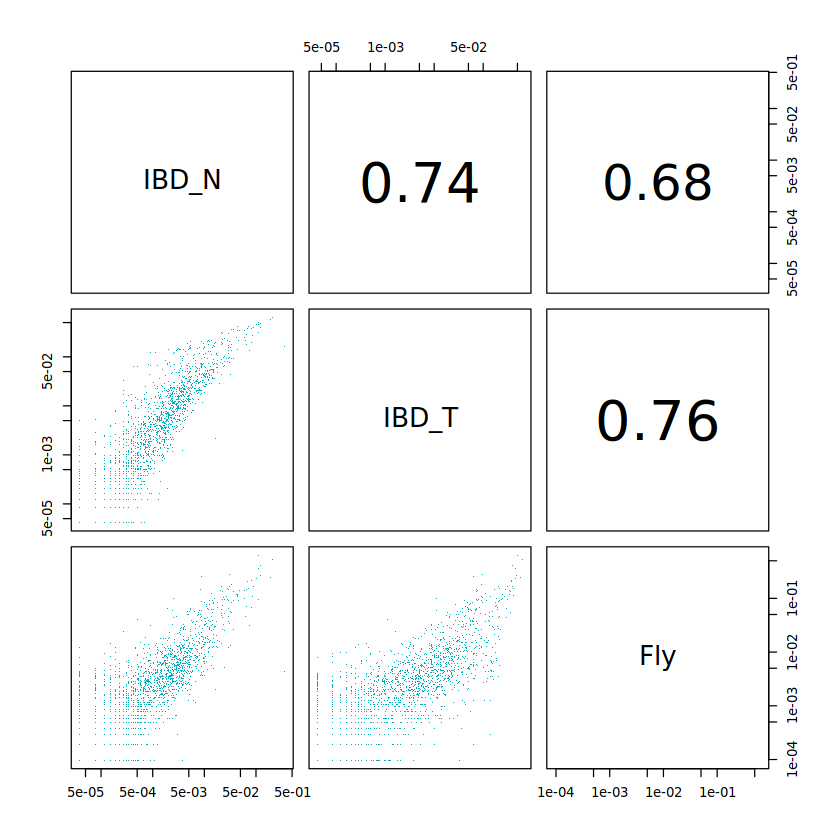

In [161]:
.plotCorrelation(T[,2:ncol(T)])


In [154]:
.plotCorrelation <- function(TSS.all.samples){
  z <- TSS.all.samples
  # Customize lower panel
  panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1), xlog = FALSE, ylog = FALSE)
    r <- round(cor(x, y), digits=2)
    txt <- paste0( r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
  }
  # Customize upper panel
  upper.panel<-function(x, y){
    points(x,y, pch = ".",col = "#00AFBB")
  }
  # Create the plots
  suppressWarnings(pairs(z, lower.panel = upper.panel,upper.panel = panel.cor))
}
pdf(file = paste0(OUTDIR,"fig9.1.correlation_mouse_fly_merge.pdf"), width=6, height =6)
.plotCorrelation(T[,2:ncol(T)])
dev.off()


png 
  2

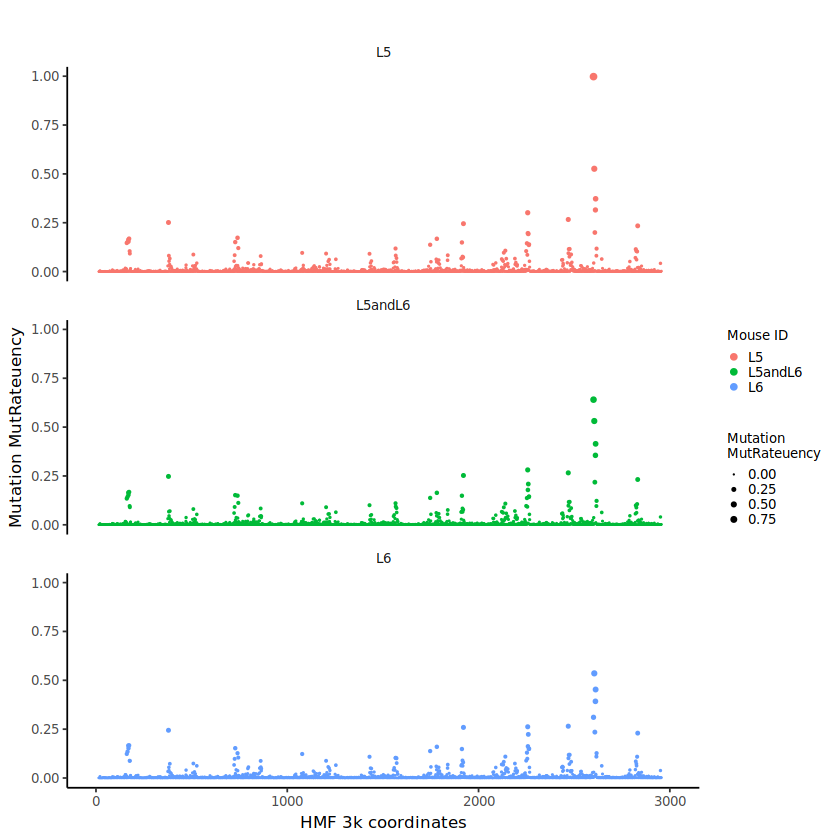

In [155]:
fly <- read.delim("/data2/kantian/LineageTracing/SMALT/0.Results/9.fly/PerSiteMutationRate.tsv",header =TRUE)
fly$Posi <- 2957-fly$Posi
ggplot(fly, aes(x=Posi,y=MutRate,color = Fly))+
  geom_point(aes(size=MutRate))+scale_size_continuous(range = c(0.01,1.5))+
  facet_wrap(~Fly, ncol=1)+theme_classic()+xlim(0,3004)+
  ggtitle("")+xlab("HMF 3k coordinates")+ylab("Mutation MutRateuency")+
  theme(strip.background = element_blank(), legend.key.size = unit(0.3,"cm"),
        text = element_text(size=10),legend.title=element_text(size=8),
        legend.text = element_text(size = 8))+
  labs(size="Mutation\nMutRateuency", colour="Mouse ID")

In [ ]:
## label binding sites region
PHYDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/2.final_phy_re/"
setwd(PHYDIR)
refDF <- read.delim("/data2/kantian/LineageTracing/SMALT/reference/3K_coordinate3004.txt",
                    header = TRUE)
setDT(refDF)
refDF[, start:= ifelse(direction == "forward", X3004 + 1, X1 - 80)]
refDF[, end:= ifelse(direction == "forward", X3004 + 80, X1 - 1)]

################################################################################
## 1. geom_bar aes(x=pos,y=numMut) by samples
## 1. geom_bar aes(x=pos,y=numMut) by samples
df <- data.table()
for(my.type in 1:2){
  samples = samplesall[[my.type]]
  for(my.sample in samples){
    # message("Calculating ", my.sample, "...")
    x <- read.delim(paste0(my.sample,"_filtered_re.phy"),header = F, sep = " ",
                    colClasses=c("character","character"),skip = 2,
                    col.names = c("cellID","bi"))
    # print(nrow(x))
    if(nrow(x)>0){
      new <- sapply(as.list(1:nrow(x)),function(i){
        s <- x$bi[i]
        which(strsplit(s,"")[[1]]=="1")
      })
      new <- unlist(new)
      d <- data.table(table(new))
      colnames(d) <-c("pos","numMut")
      d[, freq := numMut/nrow(x)]
      d[, sample := my.sample]
      d[,sampleType:= sampleTypes[my.type]]
      df <- rbind(df, d)
    }
  }
}
df$mouseID <- sapply(strsplit(df$sample, split = "_"), `[`, 1)
df$mouseID <- as.character(df$mouseID)
df$pos <- as.numeric(df$pos)
df=df[pos != 2674 & pos != 2605]
df$mouseID <- factor(df$mouseID, levels = c("2","4","5","16","19","47","49","50","65","66"))#,"68","72","WT1","WT2"
# p1 <- ggplot(df[mouseID %in% c("4","5","16","49","66")], aes(x=pos,y=freq,fill = mouseID))+
p1 <- ggplot(df, aes(x=pos,y=freq,color = mouseID))+
  geom_point(aes(size=freq))+scale_size_continuous(range = c(0.01,1.5))+
  facet_wrap(~sampleType, ncol=1)+theme_classic()+xlim(0,3004)+
  ggtitle("")+xlab("HMF 3k coordinates")+ylab("Mutation frequency")+
  theme(strip.background = element_blank(), legend.key.size = unit(0.3,"cm"),
        text = element_text(size=10),legend.title=element_text(size=8),
        legend.text = element_text(size = 8))+
  labs(size="Mutation\nfrequency", colour="Mouse ID")
p1 <- p1+geom_rect(data = NULL, aes(xmin=0,xmax = 3004,ymin=-0.15, ymax=-0.05), fill = "#bdbdbd",color = "#bdbdbd")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[1,X1],xmax = refDF[1,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[2,X1],xmax = refDF[2,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[3,X1],xmax = refDF[3,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[4,X1],xmax = refDF[4,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[5,X1],xmax = refDF[5,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[6,X1],xmax = refDF[6,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[7,X1],xmax = refDF[7,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[8,X1],xmax = refDF[8,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[9,X1],xmax = refDF[9,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[10,X1],xmax = refDF[10,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[11,X1],xmax = refDF[11,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[12,X1],xmax = refDF[12,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[13,X1],xmax = refDF[13,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[14,X1],xmax = refDF[14,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[15,X1],xmax = refDF[15,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[16,X1],xmax = refDF[16,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1


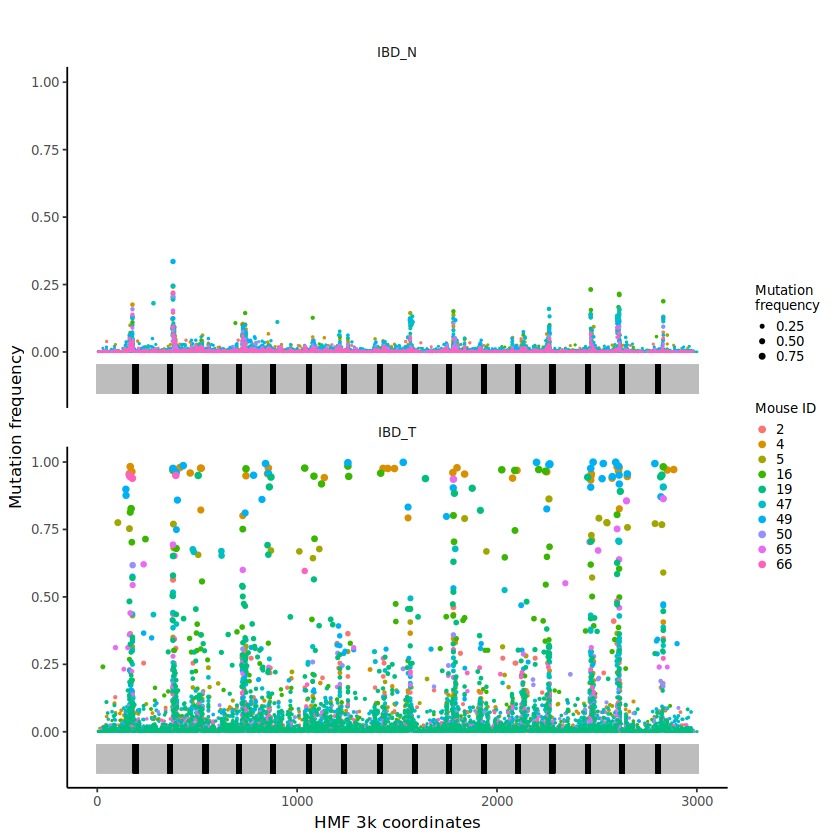

In [121]:
p1

In [126]:
fly[1:2,]

,Fly,Posi,Alt,Ref,MutRate
,<chr>,<dbl>,<int>,<int>,<dbl>
1,L5andL6,28,29,10395,0.0027820414
2,L5andL6,29,2,10422,0.0001918649


In [123]:
df[1:2,]

pos,numMut,freq,sample,sampleType,mouseID
<dbl>,<int>,<dbl>,<chr>,<chr>,<fct>
31,1,0.004854369,2_N,IBD_N,2
43,1,0.004854369,2_N,IBD_N,2


In [156]:
x <- fly[,c(1,2,5)]
y <- df[,c(6,1,3,5)]
x$sampleType <- "Fly"
colnames(x) <- c("sample","Posi","MutRate","sampleType")
colnames(y) <- c("sample","Posi","MutRate","sampleType")
z <- rbind(x[x$sample %in% c("L5","L6"),],y)
z[1:3,]

,sample,Posi,MutRate,sampleType
,<chr>,<dbl>,<dbl>,<chr>
2944,L5,2956,0.0029982011,Fly
2945,L5,2955,0.0001998801,Fly
2946,L5,2954,0.0011992804,Fly


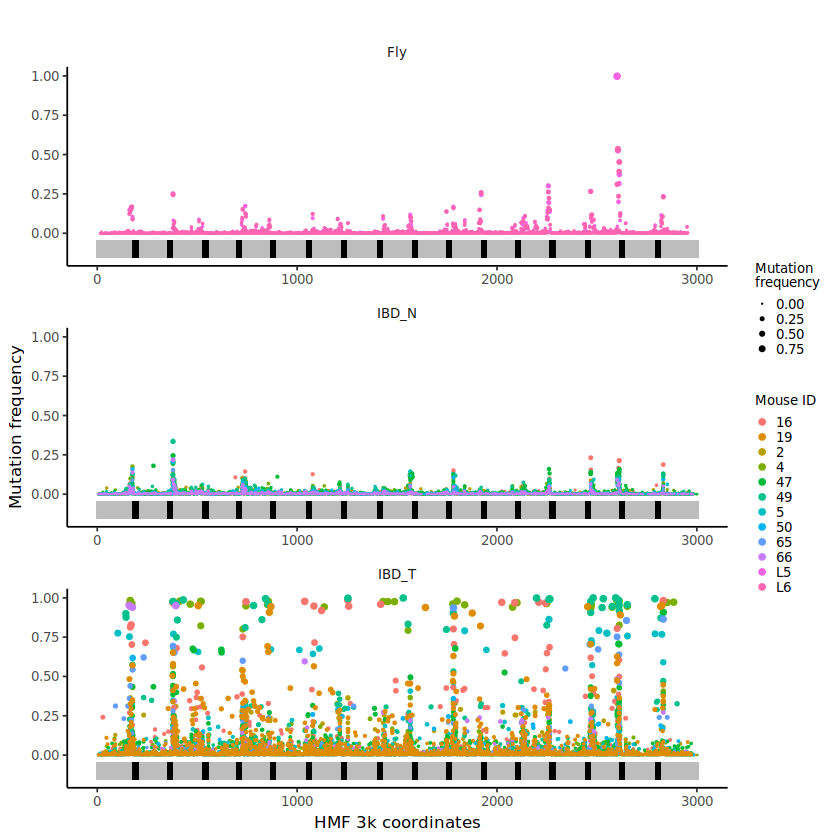

In [157]:
p1 <- ggplot(z, aes(x=Posi,y=MutRate,color = sample))+
  geom_point(aes(size=MutRate))+scale_size_continuous(range = c(0.01,1.5))+
  facet_wrap(~sampleType, ncol=1, scale="free")+theme_classic()+xlim(0,3004)+ylim(-0.15,1)+
  ggtitle("")+xlab("HMF 3k coordinates")+ylab("Mutation frequency")+
  theme(strip.background = element_blank(), legend.key.size = unit(0.3,"cm"),
        text = element_text(size=10),legend.title=element_text(size=8),
        legend.text = element_text(size = 8))+
  labs(size="Mutation\nfrequency", colour="Mouse ID")
p1 <- p1+geom_rect(data = NULL, aes(xmin=0,xmax = 3004,ymin=-0.15, ymax=-0.05), fill = "#bdbdbd",color = "#bdbdbd")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[1,X1],xmax = refDF[1,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[2,X1],xmax = refDF[2,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[3,X1],xmax = refDF[3,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[4,X1],xmax = refDF[4,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[5,X1],xmax = refDF[5,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[6,X1],xmax = refDF[6,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[7,X1],xmax = refDF[7,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[8,X1],xmax = refDF[8,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[9,X1],xmax = refDF[9,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[10,X1],xmax = refDF[10,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[11,X1],xmax = refDF[11,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[12,X1],xmax = refDF[12,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[13,X1],xmax = refDF[13,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[14,X1],xmax = refDF[14,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[15,X1],xmax = refDF[15,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1 <- p1+geom_rect(data = NULL, aes(xmin=refDF[16,X1],xmax = refDF[16,X3004],ymin=-0.15, ymax=-0.05), fill = "black",color = "black")
p1


In [158]:
pdf(file = paste0(OUTDIR,"fig9.1.3K_mutation_distribution.pdf"), width=6, height =8)
p1
dev.off()


png 
  2